In [1]:
import mysql.connector
from mouseBehavior import mouseBehaviorData as mbd
from matplotlib import pyplot as plt
import os
import pandas as pd
import numpy as np
from analysis import checkforMouseBehaviorObject
import analysis

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [21]:
mouseID = '531237'

In [ ]:
save_mouse_obj = True
overwrite = True

#First look to see if there's already a behavior dataframe pkl file with this mouse's data
mouseBehaviorObjectPath = r"\\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\production"
mouseBehaviorPklpath = checkforMouseBehaviorObject(mouseBehaviorObjectPath, mouseID)

if mouseBehaviorPklpath is not None:
    if overwrite:
        print('overwriting data')
        m = mbd(mouse_id=mouseID, daysBeforeHandoff=100)
        m.buildBehaviorDataframe(all_sessions=True, overwrite_behdf=True)
    else:
        print('reading from pickle')
        m = mbd()
        m.loadFromPickle(mouseBehaviorPklpath)
        m.buildBehaviorDataframe(update=True)
else:
    print('fetching data')
    m = mbd(mouse_id=mouseID, daysBeforeHandoff=100)
    m.buildBehaviorDataframe(all_sessions=True)

if save_mouse_obj:
    m.saveDirectory = mouseBehaviorObjectPath
    m.saveToPickle()

checking \\allen\programs\braintv\workgroups\nc-ophys\corbettb\NP_behavior_pipeline\behavior_sessions\production for mouse object pkl
Did not find existingmouseBehaviorObject for mouse 531237
fetching data
Loaded data from 200922115910_531237_979655d3-69af-4823-a683-da840d11b4b7.pkl
Loaded data from 200922115910_531237_979655d3-69af-4823-a683-da840d11b4b7.pkl
Loaded data from 200923122347_531237_40e85531-c9af-43f7-8cc6-ba041b5b9a18.pkl
Loaded data from behavior-9307a6db27624e43922986d100d46a2f-531237.pkl
Loaded data from 200924121418_531237_051c27d3-0f31-43b2-ad8a-44c583fe9e16.pkl
Loaded data from behavior-87a0e0102ec7463ea56d403f7a9ca0a1-531237.pkl
Loaded data from 200925115439_531237_a951b309-2a02-47f4-a68d-95db06437705.pkl
Loaded data from behavior-b167a32d73a94b16972dbcefa5774ac6-531237.pkl
Loaded data from behavior-4170381b9020475ab55cbb7646588b1c-531237.pkl
Loaded data from behavior-8d1c3f3c9cd34dd59d0057344a24739f-531237.pkl
Loaded data from behavior-d6b73700b8cc4bff836ae191665d

In [16]:
#m.buildBehaviorDataframe(all_sessions=True, overwrite_behdf=True)
m.saveDirectory = mouseBehaviorObjectPath
m.saveToPickle()

In [20]:
m.beh_df[['stage', 'session_datetime_local']]

,stage,session_datetime_local
14,EPHYS_1_images_H_3uL_reward,2020-10-08 15:12:55.061000-07:00
12,pretest_EPHYS_1_images_B_5uL_reward,2020-10-08 14:01:29.492000-07:00
10,pretest_EPHYS_1_images_B_5uL_reward,2020-10-08 13:54:17.107000-07:00
9,pretest_EPHYS_1_images_B_5uL_reward,2020-10-08 13:49:14.630000-07:00
7,EPHYS_1_images_G_3uL_reward,2020-10-07 14:01:41.373000-07:00
3,pretest_EPHYS_1_images_B_5uL_reward,2020-10-07 12:23:52.010000-07:00
15,HABITUATION_5_images_G_handoff_ready_3uL_reward,2020-10-06 13:14:17.981000-07:00
5,HABITUATION_5_images_G_handoff_ready_3uL_reward,2020-10-05 12:51:41.150000-07:00
1,HABITUATION_5_images_G_handoff_ready_3uL_reward,2020-10-02 11:31:34.080000-07:00
18,HABITUATION_5_images_G_handoff_ready_3uL_reward,2020-10-01 11:25:06.431000-07:00


In [11]:
toAnalyze = m.behavior_sessions
toAnalyze['pklfile'] = toAnalyze.apply(lambda row: m.getPicklePath(row['storage_directory']), axis=1)
toAnalyze['trials'] = toAnalyze.apply(lambda row: m.getTrialsDF(row['pklfile']), axis=1)

Loaded data from behavior-7035fdd42f86464198d7ed4bf4efd745-533539.pkl
Loaded data from behavior-7035fdd42f86464198d7ed4bf4efd745-533539.pkl
Loaded data from behavior-6e3c8cbd83fa46659d6dfbec82d6217e-533539.pkl
Loaded data from behavior-832c7fdd4b404917b200af0317d7b537-533539.pkl
Loaded data from behavior-0f2cb789461c4a83b4af00ae2425eb74-533539.pkl
Loaded data from behavior-091606faa9fd4748a9b5a84c9034d893-533539.pkl
Loaded data from behavior-475aae0b8284481892ffff726c978a8f-533539.pkl
Loaded data from behavior-79f4f377bde249399a779b93c77d88d4-533539.pkl
Loaded data from behavior-17413daf50bc4efa83636727e637fd69-533539.pkl
Loaded data from behavior-7ad6124d4c524b3082ee65401938e86c-533539.pkl
Loaded data from 200925091315_533539_403cadd4-6a4c-4f42-9c08-96f85c6ba37c.pkl
Loaded data from 200924101334_533539_16ac3665-5eb1-44f1-a67a-b38d79c6d89d.pkl
Loaded data from 200923094116_533539_9d5bacd1-023b-442a-970a-30059fd4b1bf.pkl
Loaded data from 200922095044_533539_1fbe1ba7-2936-412d-873d-6cf16

In [13]:
toAnalyze['stage'] = toAnalyze.apply(lambda row: row['trials']['stage'][0], axis=1)
toAnalyze['stage']

0                          EPHYS_1_images_H_3uL_reward
1                          EPHYS_1_images_G_3uL_reward
2      HABITUATION_5_images_G_handoff_ready_3uL_reward
3      HABITUATION_5_images_G_handoff_ready_3uL_reward
4      HABITUATION_5_images_G_handoff_ready_3uL_reward
5      HABITUATION_5_images_G_handoff_ready_3uL_reward
6      HABITUATION_5_images_G_handoff_ready_3uL_reward
7      HABITUATION_5_images_G_handoff_ready_5uL_reward
8      HABITUATION_5_images_G_handoff_ready_5uL_reward
9         TRAINING_5_images_G_handoff_ready_5uL_reward
10        TRAINING_5_images_G_handoff_ready_5uL_reward
11             TRAINING_5_images_G_epilogue_5uL_reward
12             TRAINING_5_images_G_epilogue_5uL_reward
13             TRAINING_4_images_G_training_7uL_reward
14                     TRAINING_3_images_G_10uL_reward
15                     TRAINING_3_images_G_10uL_reward
16                     TRAINING_3_images_G_10uL_reward
17             TRAINING_2_gratings_flashed_10uL_reward
18        

<IPython.core.display.Javascript object>


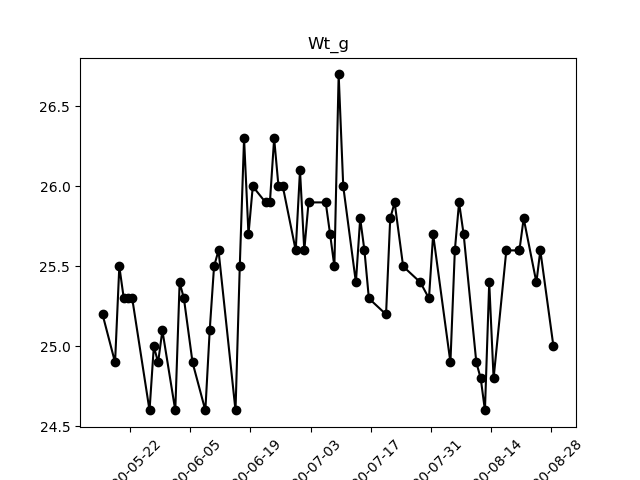

<IPython.core.display.Javascript object>


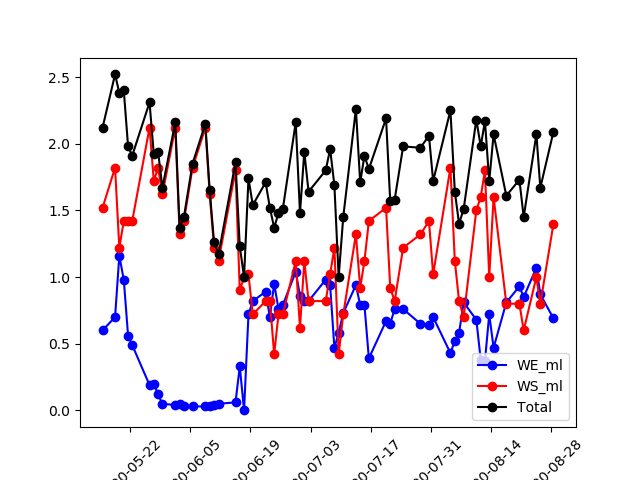

<IPython.core.display.Javascript object>


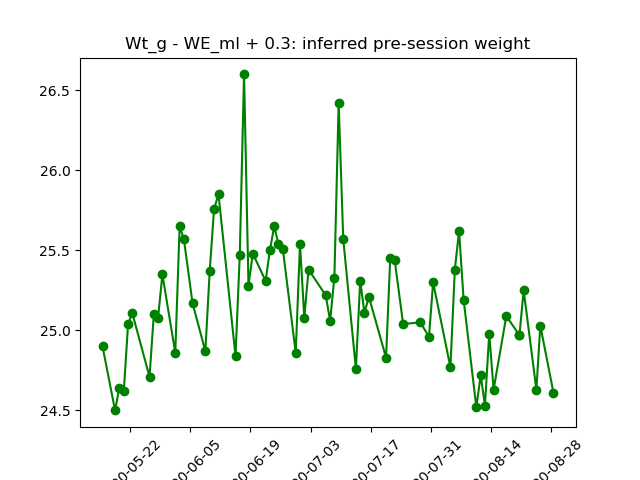

In [105]:
import analysis
analysis.plot_weight_over_time(m.beh_df)
analysis.plot_water_allotment(m.beh_df)
analysis.plot_inferred_presession_weight(m.beh_df, water_loss_during_session=0.3)

<IPython.core.display.Javascript object>


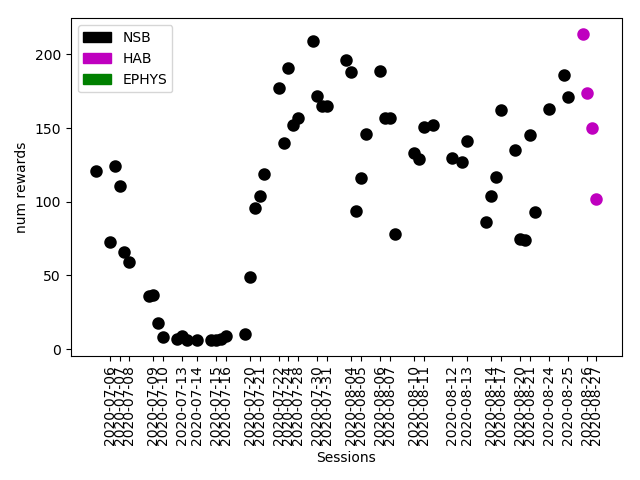

In [12]:
analysis.plotSessionHistory(m.beh_df)

In [30]:
#Simulate mTrain criteria
from mtrain_simulator import meets_hit_threshold_average, \
    meets_engagement_criteria_logged, meets_engagement_and_hit_threshold

alltrials = m.beh_df['trials'].to_list()
alltrials = pd.concat(alltrials)

class Mouse():
    
    def __init__(self, tc):
        self.trials = tc
        self.LabTracks_ID = '00000'
        self.session_summary = {}

mouse = Mouse(alltrials)
import logging
print(meets_hit_threshold_average(mouse))
print(meets_engagement_criteria_logged(mouse))
print(meets_engagement_and_hit_threshold(mouse))

behavior_session_uuid
c94b57ae-c553-4617-b9c0-42cc455e7d13      0.0
7c854164-1dfb-4ce9-a626-ce2030912f53     68.0
248f4c09-b13e-414b-9b17-1704ad7b82ad    108.0
808e40f5-28d4-44c4-9906-1e44267b59f1     85.0
2ae104d1-99c7-4175-96ca-4861ccd46de0     44.0
c3a5500c-a9b1-4201-b70a-902de9d75a49     37.0
0b333253-0069-43fe-979a-7b2764197965      2.0
ca837ee4-d4a4-4664-92fb-ece69147e66e      2.0
85ad2f26-f103-4597-b59d-9813d726e18a     12.0
ceef7da2-9dbf-482c-a871-7e224cf673cf      3.0
774891f7-e0f3-4641-bca5-8fd05cf46938      2.0
b1943625-3023-424c-9b11-6711fc12ddda      4.0
b8b79d20-04fb-49a4-afa1-7ceebe0234a6      1.0
383c196b-81c0-4b12-a7cd-8970815039a8      1.0
e261f6ce-218c-4399-84d6-4629bb7228cd      1.0
34d39b7b-afef-40aa-b96c-e242c11fb149      1.0
bb1d4100-a716-4862-a763-ac2a9ba962e6      2.0
66f850eb-ac22-4a55-9a51-5caf54b42407      4.0
4bc329c9-befb-4786-848d-80ae08d92b83      5.0
ab10d7f0-dfe8-4119-a22b-877e25c81bc2     43.0
ada1d0a0-485f-4382-ba4d-6cdfd9135686     91.0
7f980151-30c

In [122]:
m.buildBehaviorDataframe(update=True)

updating dataframe with new behavior sessions
Found 2 new sessions
Loaded data from behavior-253f868138d74649b1c44e0813aa2afb-509808.pkl
Loaded data from behavior-253f868138d74649b1c44e0813aa2afb-509808.pkl
Loaded data from behavior-3ad65d4f0fab4a25b918d0db22d11564-509808.pkl
merging new data into dataframe
